<a href="https://colab.research.google.com/github/Bo-fromLA/SPARKS_internship/blob/main/SPARKS_KMeans_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictions using unsupervised ML

## KMeans Clustering on the Iris Dataset
---
---

*Level - Beginner*

---
done by Botakoz Urazaliyeva for SPARKS GRIP, Aug, 2024

---


## Task:

- perform KMeans clustering to group the data points into clusters and visualize the results.

## 1. Importing Libraries
First, we import the necessary libraries for data manipulation, clustering, and visualization.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

print('All libraries successfully installed')

All libraries successfully installed


## 2. Loading and Exploring the Dataset
We load the Iris dataset from a CSV file and explore its dimensions and any missing values as a way of a very brief data verification


In [ ]:
df=pd.read_csv('/content/Iris.csv', index_col='Id')
print('The dimensions of the Iris dataset are: ', df.shape)
print(df.isna().sum())
df.head()

The dimensions of the Iris dataset are:  (150, 5)
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Preparing the Data for Clustering
We drop the 'Species' column as it is not needed for clustering and convert the DataFrame to a NumPy array.

In [ ]:
iris = df.drop('Species', axis=1).values

## 4. Finding the Optimal Number of Clusters (Elbow Method)
We calculate the sum of squared errors (SSE) for different numbers of clusters and use the elbow method to determine the optimal number of clusters.

In [ ]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=11)
    kmeans.fit(iris)
    sse.append(kmeans.inertia_)

# Automating the finding of the elbow/knee

kl = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
cluster_num=kl.elbow
print(f'Optimal number of clusters is: {cluster_num}')    # Output: 3

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

## 5. Plotting the Elbow Method
We visualize the SSE values to illustrate the elbow point and confirm the optimal number of clusters.

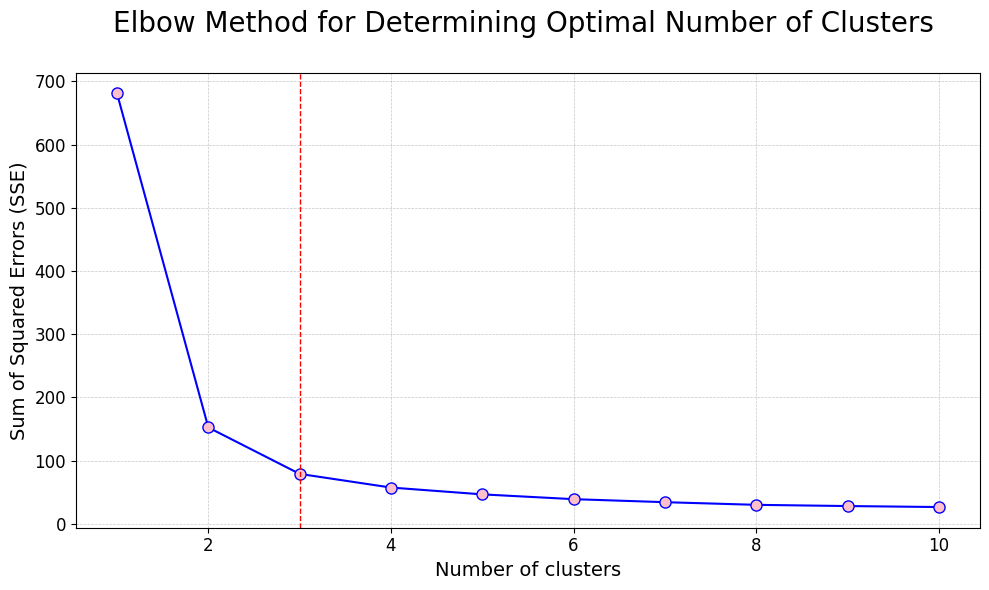

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b', markersize=8, markerfacecolor='pink')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Sum of Squared Errors (SSE)', fontsize=14)
plt.title('Elbow Method for Determining Optimal Number of Clusters \n', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.axvline(x=3, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

## 6. Applying KMeans Clustering
We apply KMeans clustering with the optimal number of clusters and add the cluster labels to the DataFrame.

In [ ]:
kmeans = KMeans(n_clusters=cluster_num, init='k-means++', random_state=11)
result=kmeans.fit_predict(iris)
df['Cluster']=kmeans.labels_
centroids = kmeans.cluster_centers_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


## 7. Visualizing the Clusters and Centroids
We visualize the clusters using a scatter plot, coloring each cluster and marking the centroids.

*we use only the first two columns for this task*

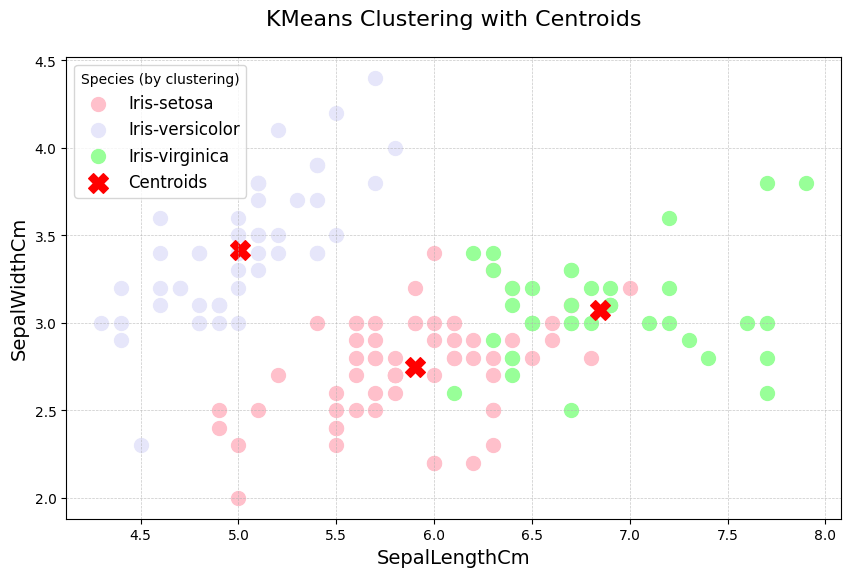

In [ ]:
#Plotting the clusters by species
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[kmeans.labels_ == 0, 0], df.iloc[kmeans.labels_ == 0, 1], s=100, c='#FFC0CB', label='Iris-setosa')
plt.scatter(df.iloc[kmeans.labels_ == 1, 0], df.iloc[kmeans.labels_ == 1, 1], s=100, c='#E6E6FA', label='Iris-versicolor')
plt.scatter(df.iloc[kmeans.labels_ == 2, 0], df.iloc[kmeans.labels_ == 2, 1], s=100, c='#98FF98', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Enhancing the plot for visual appeal
plt.xlabel(df.columns[0], fontsize=14)
plt.ylabel(df.columns[1], fontsize=14)
plt.title('KMeans Clustering with Centroids\n', fontsize=16)
plt.legend(title='Species (by clustering)', loc='best', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()